<a href="https://colab.research.google.com/github/ziwon-hwang/DDWU_Outlier/blob/main/outlier7%EC%A1%B0_%EC%8B%AC%EC%83%81%EC%A0%95%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링 테스트

In [1]:
import os
import sys
import urllib.request

In [2]:
import pandas as pd
import numpy as np

In [5]:
# 함수로 정의 / txt 파일로 저장

import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

# 크롤링 실습

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 불필요한 내용 제거

In [18]:
data=pd.read_csv("/content/drive/MyDrive/outlier/심상정.csv")
#data=data['comment']
data

,tweet,date,retweets_count,link
0,이번투표는 남자는 안뽑을것같다 심상정이 다른 정치인들보다 클 린하다 옳은사람이다 이...,2021-11-22,0,https://twitter.com/ppappapdirara/status/14627...
1,심상정 안철수에 빠른 시일 내 조건 없이 만나자 양당체제 종식 기자회견서 안철수 김...,2021-11-22,1,https://twitter.com/no1nmh/status/146277465092...
2,단지 소수자인 자신을 심상정이 언급해주는 것만으로 감동받아 지지해주는 분들이 있는가...,2021-11-22,1,https://twitter.com/escrimeurk/status/14627742...
3,심상정이 안철수의 제안을 긍정적으로 수용한 듯한데 트위터 좌파 의 일부의 부정적 반...,2021-11-22,1,https://twitter.com/escrimeurk/status/14627735...
4,histopian 몇몇 철 안든 어린 의원들 치기나 미성숙이라고 생각했는데 정의당...,2021-11-22,0,https://twitter.com/EunieShin/status/146277347...
...,...,...,...,...
333,심상정 사적 욕망에 李 비판 인정욕구 강해 김어준 방송 심리분석 김어준이 사적 욕...,2021-11-21,0,https://twitter.com/dareto_tell_oo/status/1462...
334,양당제가 아닌 우리나라서 40년 묵은 두당정치 란 의미는 정의당 니들이 그간 국민들...,2021-11-21,0,https://twitter.com/GreedyWhiteBear/status/146...
335,심상정 이재명과의 단일화 가당치 않다 발언 등 분석 Pi4a6md9zV,2021-11-21,4,https://twitter.com/estarkkr/status/1462304136...
336,난 걍 되든 안 되든 심상정 찍을꺼야 저딴 똥에 내 투표권 행사할 순 없어 트위터리...,2021-11-21,0,https://twitter.com/ferret_in_nest/status/1462...


In [20]:
# 한글과 띄어쓰기만 추출
import re
result=[]
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
#hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

for i in range(len(data)):
  result.append(hangul.sub('', data['tweet'][i])) 
result

['이번투표는 남자는 안뽑을것같다 심상정이 다른 정치인들보다 클 린하다 옳은사람이다 이런말은 못하겠는데 적어도 대놓고 쌉소리는 않하잖여 ',
 '심상정 안철수에 빠른 시일 내 조건 없이 만나자 양당체제 종식 기자회견서 안철수 김동연에 회동 제안 노회찬 없는 정의당 참 안쓰럽다 페미들만 잔뜩 모아 놓은 이상한 모습에 사욕 가득한 심상정 ',
 '단지 소수자인 자신을 심상정이 언급해주는 것만으로 감동받아 지지해주는 분들이 있는가 하면 그저 겉멋에 들어 대학교 학술동아리를 졸업 후에도 꾸준히 하고 있는 머저리들도 있고 ',
 '심상정이 안철수의 제안을 긍정적으로 수용한 듯한데 트위터 좌파 의 일부의 부정적 반응을 보니 역시',
 '  몇몇 철 안든 어린 의원들 치기나 미성숙이라고 생각했는데 정의당 지도부의 총체적 난국이네요 그 내용을 다 들은 사람으로 심상정 후보 이해하는데 도움이 됐지 네가티브 아니라고 생각했는데 정의당엔 지도자가 없네요 ',
 '외부인사 추천 허경영 안철수 심상정',
 '사회심리연구소 함께 의 김태형 소장 년도 심상정 후보측의 요청으로 심상정이라는 인물에 대한 책을 공저함 그때 심리분석도 함께 씀 다큰 어른은 크게 변하지 않는다 는 얘기와 함께 년전 책내용 그대로 말한건데 왜 이제와서 딴지야 정의당은 니들도 이 책 안봤냐 ',
 '이재명 윤석열이 저렇게 멍청하게 하는데도 말 잘하고 정책 잘내는 심상정이 밀린다는게 안 믿김',
 '한국인분들 심상정 의원을 청와대로 보내 주길 바랍니다 ',
 '투자의 입장에서 봐도 이재명은 오너만 해먹는 자본잠식 부실기업 윤석열은 대가리 빈 페이퍼컴퍼니 심상정은 평타정도 치는 강소기업인데 주식이고 코인이고 투자 광풍이 분 나라치고 망하지는 않을 강소기업에는 절대 투자를 안하려는 꼬라지가 너무나 한국 수준에 딱 맞는 상황인듯 ',
 '민주당 이명박과 남자 박근혜가 대선후보라는 초유의 사태에서 둘 다 최악의 선택지임에도 굳이 심상정은 고려조차 안한다는거 이성적으로 생각할 때 이재명과 윤석열은 진짜 좆되는 선택이지만 심상

In [21]:
for k in range(len(result)):
  result[k]=result[k].replace('\n',' ')
  result[k]=result[k].replace('\t',' ')

# 불필요한 내용 제거
   

In [25]:
#result_split = result.split('포스팅 내용')
#result_split[1]
#result_split
result[0]

'이번투표는 남자는 안뽑을것같다 심상정이 다른 정치인들보다 클 린하다 옳은사람이다 이런말은 못하겠는데 적어도 대놓고 쌉소리는 않하잖여 '

In [26]:
file = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt',"w", encoding='utf-8')
file.write(str(result))
file.close()

# 형태소 분석

In [24]:
data_split = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt', 'r', encoding='utf-8').read()
data_split = [[data_split,1]]
print(data_split)

[["['이번투표는 남자는 안뽑을것같다 심상정이 다른 정치인들보다 클 린하다 옳은사람이다 이런말은 못하겠는데 적어도 대놓고 쌉소리는 않하잖여 ', '심상정 안철수에 빠른 시일 내 조건 없이 만나자 양당체제 종식 기자회견서 안철수 김동연에 회동 제안 노회찬 없는 정의당 참 안쓰럽다 페미들만 잔뜩 모아 놓은 이상한 모습에 사욕 가득한 심상정 ', '단지 소수자인 자신을 심상정이 언급해주는 것만으로 감동받아 지지해주는 분들이 있는가 하면 그저 겉멋에 들어 대학교 학술동아리를 졸업 후에도 꾸준히 하고 있는 머저리들도 있고 ', '심상정이 안철수의 제안을 긍정적으로 수용한 듯한데 트위터 좌파 의 일부의 부정적 반응을 보니 역시', '  몇몇 철 안든 어린 의원들 치기나 미성숙이라고 생각했는데 정의당 지도부의 총체적 난국이네요 그 내용을 다 들은 사람으로 심상정 후보 이해하는데 도움이 됐지 네가티브 아니라고 생각했는데 정의당엔 지도자가 없네요 ', '외부인사 추천 허경영 안철수 심상정', '사회심리연구소 함께 의 김태형 소장 년도 심상정 후보측의 요청으로 심상정이라는 인물에 대한 책을 공저함 그때 심리분석도 함께 씀 다큰 어른은 크게 변하지 않는다 는 얘기와 함께 년전 책내용 그대로 말한건데 왜 이제와서 딴지야 정의당은 니들도 이 책 안봤냐 ', '이재명 윤석열이 저렇게 멍청하게 하는데도 말 잘하고 정책 잘내는 심상정이 밀린다는게 안 믿김', '한국인분들 심상정 의원을 청와대로 보내 주길 바랍니다 ', '투자의 입장에서 봐도 이재명은 오너만 해먹는 자본잠식 부실기업 윤석열은 대가리 빈 페이퍼컴퍼니 심상정은 평타정도 치는 강소기업인데 주식이고 코인이고 투자 광풍이 분 나라치고 망하지는 않을 강소기업에는 절대 투자를 안하려는 꼬라지가 너무나 한국 수준에 딱 맞는 상황인듯 ', '민주당 이명박과 남자 박근혜가 대선후보라는 초유의 사태에서 둘 다 최악의 선택지임에도 굳이 심상정은 고려조차 안한다는거 이성적으로 생각할 때 이재명과 윤석열은 진짜 좆되는 선택이지만 심상정은 최소한 

In [27]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 448 kB 60.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [28]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(doc):
    return [t for t in okt.pos(doc, norm=True, stem=True)]      # norm은 정규화, stem은 근어로 표시

tokenize_docs = [(tokenize(row[0]), row[1]) for row in data_split]

with open('/content/drive/MyDrive/Colab Notebooks/tokenized_data', 'w', encoding="utf-8") as make_file:     # JSON 파일로 저장
    json.dump(tokenize_docs, make_file, ensure_ascii=False, indent="\t")
tokenize_docs[0]

([("['", 'Punctuation'),
  ('이번', 'Noun'),
  ('투표', 'Noun'),
  ('는', 'Josa'),
  ('남자', 'Noun'),
  ('는', 'Josa'),
  ('안', 'VerbPrefix'),
  ('뽑다', 'Verb'),
  ('같다', 'Adjective'),
  ('심상정', 'Noun'),
  ('이', 'Josa'),
  ('다른', 'Noun'),
  ('정치인', 'Noun'),
  ('들', 'Suffix'),
  ('보다', 'Josa'),
  ('크다', 'Verb'),
  ('린', 'Noun'),
  ('하다', 'Verb'),
  ('옳다', 'Adjective'),
  ('사람', 'Noun'),
  ('이다', 'Josa'),
  ('이런', 'Modifier'),
  ('말', 'Noun'),
  ('은', 'Josa'),
  ('못', 'VerbPrefix'),
  ('하다', 'Verb'),
  ('적어도', 'Adverb'),
  ('대놓고', 'Adverb'),
  ('싸다', 'Verb'),
  ('소리', 'Noun'),
  ('는', 'Josa'),
  ('않다', 'Verb'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('심상정', 'Noun'),
  ('안철수', 'Noun'),
  ('에', 'Josa'),
  ('빠르다', 'Adjective'),
  ('시일', 'Noun'),
  ('내', 'Noun'),
  ('조건', 'Noun'),
  ('없이', 'Adverb'),
  ('만나다', 'Verb'),
  ('양', 'Modifier'),
  ('당', 'Modifier'),
  ('체제', 'Noun'),
  ('종식', 'Noun'),
  ('기자회견', 'Noun'),
  ('서', 'Josa'),
  ('안철수', 'Noun'),
  ('김동연', 'Noun'),
  ('에', 'Josa'),
 

# 워드클라우드

In [29]:
# 빈도수 세기

from collections import Counter
counter = Counter(tokenize_docs[0][0])
count_words = sorted(counter.items(), key=lambda x:-x[1])
count_words

[(('심상정', 'Noun'), 371),
 (("',", 'Punctuation'), 337),
 (("'", 'Punctuation'), 337),
 (('하다', 'Verb'), 292),
 (('이', 'Josa'), 211),
 (('을', 'Josa'), 159),
 (('은', 'Josa'), 119),
 (('에', 'Josa'), 119),
 (('의', 'Josa'), 116),
 (('안철수', 'Noun'), 110),
 (('가', 'Josa'), 108),
 (('후보', 'Noun'), 105),
 (('들', 'Suffix'), 104),
 (('를', 'Josa'), 93),
 (('는', 'Josa'), 76),
 (('이재명', 'Noun'), 71),
 (('정의당', 'Noun'), 66),
 (('도', 'Josa'), 65),
 (('되다', 'Verb'), 62),
 (('있다', 'Adjective'), 57),
 (('윤석열', 'Noun'), 57),
 (('뽑다', 'Verb'), 55),
 (('아니다', 'Adjective'), 51),
 (('으로', 'Josa'), 47),
 (('것', 'Noun'), 46),
 (('없다', 'Adjective'), 44),
 (('만나다', 'Verb'), 40),
 (('보다', 'Verb'), 39),
 (('대선', 'Noun'), 39),
 (('없이', 'Adverb'), 32),
 (('과', 'Josa'), 32),
 (('조건', 'Noun'), 31),
 (('적', 'Suffix'), 31),
 (('같다', 'Adjective'), 29),
 (('에서', 'Josa'), 29),
 (('민주당', 'Noun'), 29),
 (('이', 'Noun'), 28),
 (('로', 'Josa'), 28),
 (('말', 'Noun'), 27),
 (('양', 'Modifier'), 26),
 (('다', 'Adverb'), 26),
 (('지대', 

In [30]:
# 명사만 추출
noun_count = {x[0][0]:x[1] for x in count_words if x[0][1]=='Noun' and len(x[0][0])>=2 and '동덕' not in x[0][0]}
noun_count

{'심상정': 371,
 '안철수': 110,
 '후보': 105,
 '이재명': 71,
 '정의당': 66,
 '윤석열': 57,
 '대선': 39,
 '조건': 31,
 '민주당': 29,
 '지대': 26,
 '김어준': 26,
 '심리': 25,
 '대통령': 25,
 '체제': 22,
 '정치': 22,
 '뉴스': 21,
 '방송': 21,
 '제안': 20,
 '분석': 20,
 '진짜': 20,
 '이번': 19,
 '국민': 19,
 '김동연': 18,
 '종식': 17,
 '생각': 17,
 '여자': 17,
 '비판': 17,
 '진보': 17,
 '의원': 15,
 '사회': 15,
 '선택': 15,
 '공조': 15,
 '다음': 15,
 '여성': 15,
 '이제': 14,
 '정책': 14,
 '연대': 14,
 '출처': 13,
 '사람': 12,
 '지지': 12,
 '무슨': 12,
 '지지율': 12,
 '한국': 11,
 '정당': 11,
 '문제': 11,
 '심리학자': 11,
 '투표': 10,
 '문재인': 10,
 '여론': 10,
 '정말': 10,
 '이유': 10,
 '진보당': 10,
 '시민': 10,
 '다른': 9,
 '시일': 9,
 '선거': 9,
 '위해': 9,
 '국민의당': 9,
 '조사': 9,
 '사적': 9,
 '욕망': 9,
 '정치인': 8,
 '허경영': 8,
 '국힘': 8,
 '정의': 8,
 '시작': 8,
 '네이버': 8,
 '고민': 8,
 '시대': 8,
 '인정': 8,
 '노회찬': 7,
 '연구소': 7,
 '욕구': 7,
 '그냥': 7,
 '다시': 7,
 '보고': 7,
 '지금': 7,
 '이야기': 7,
 '대표': 7,
 '다스': 7,
 '의미': 7,
 '지지도': 7,
 '우리': 7,
 '트럼프': 7,
 '남자': 6,
 '수준': 6,
 '성심당': 6,
 '미래': 6,
 '노동': 6,
 '유시민': 6,
 '자기': 6,
 '만남': 6

In [31]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fm._rebuild()
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf

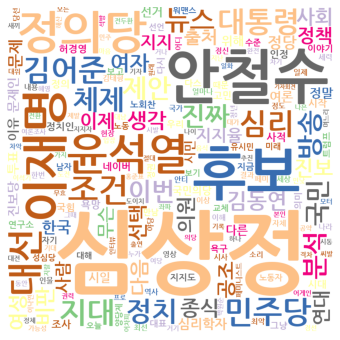

In [36]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'   # 원하는 폰트 지정

wordcloud = WordCloud(
    max_words=200, #최대 수용 단어 갯수
    background_color='white', #배경색상
    font_path=font_path,
    width = 800, #넓이
    height = 800, #길이
    colormap='Accent_r')
    
wordcloud.generate_from_frequencies(dict(noun_count))

fig =  plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/word_cloud.jpg')